In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('car_data.csv')

In [99]:
df.head()

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
0,Honda,Insight,NaN,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic
1,Mitsubishi,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic
3,Toyota,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic
4,Honda,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80572 entries, 0 to 80571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Make             80572 non-null  object
 1   Model            80572 non-null  object
 2   Version          73800 non-null  object
 3   Price            80572 non-null  object
 4   Make_Year        80572 non-null  int64 
 5   CC               80572 non-null  int64 
 6   Assembly         80572 non-null  object
 7   Mileage          80572 non-null  int64 
 8   Registered City  80572 non-null  object
 9   Transmission     80572 non-null  object
dtypes: int64(3), object(7)
memory usage: 6.1+ MB


## Data cleaning 
### Filling missing values
We can see that version has some missing values let us explore the data and see if we can fill the missing values

In [101]:
df['Version'].value_counts()

Version
GLi 1.3 VVTi               3319
VXR                        3065
VX Euro II                 1999
VX                         1916
Oriel 1.8 i-VTEC CVT       1893
                           ... 
MX                            1
M Class ML 350                1
Wagon ECO-X                   1
Freelander 2 3.2 i6 HSE       1
Wagon 20S                     1
Name: count, Length: 1339, dtype: int64

Looking at the above Versions we can tell a car's version is specific to its model and make. Since versions is a categorical variable we have two options to fill the missing values
- Fill the missing values with the mode of the column
- Fill the missing values with a new category

But since there is a lot of variations in the data we can not just fill the missing values with the mode of the column. Moreover, version of a car is specific to its model and make. So let us fill the missing values with a new category called "missing", Then we can carry out data analysis and see if we can fill the missing values with a more specific category.

In [102]:
# we will fill the missing values with a new category
df['Version'].fillna('missing', inplace=True)

### Correcting data types

In [106]:
# since we want to predict the price of the car, we will drop the rows with missing price
df['Price'] = df['Price'].replace('Call for price', np.nan)
df.dropna(subset=['Price'], inplace=True)
df['Price'] = df['Price'].astype(float)
df['Make_Year'] = df['Make_Year'].astype(int)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79363 entries, 0 to 80571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             79363 non-null  object 
 1   Model            79363 non-null  object 
 2   Version          79363 non-null  object 
 3   Price            79363 non-null  float64
 4   Make_Year        79363 non-null  int32  
 5   CC               79363 non-null  int64  
 6   Assembly         79363 non-null  object 
 7   Mileage          79363 non-null  int64  
 8   Registered City  79363 non-null  object 
 9   Transmission     79363 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 6.4+ MB


## Data Analysis
Next we move towards taking a deeper look at our data and try to find some insights from it. We will explore the price column and its relationship with other attributes in our dataset
### Price

<Axes: xlabel='Price', ylabel='Count'>

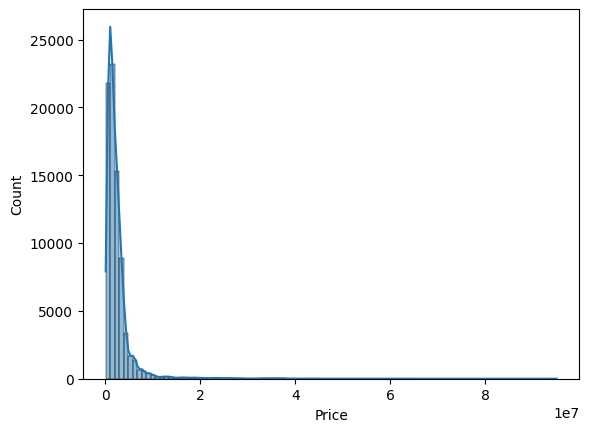

In [110]:
sns.histplot(df['Price'], bins = 100, kde = True)

we see that there is a lot of variation in the price of cars. We can observe that most values of price are between 0 and 1.5 million. There are some outliers in the data which we can call as luxury cars. Let us now investigate the features of these luxury cars. Let us investigate the price column further and see if we can find some insights from it

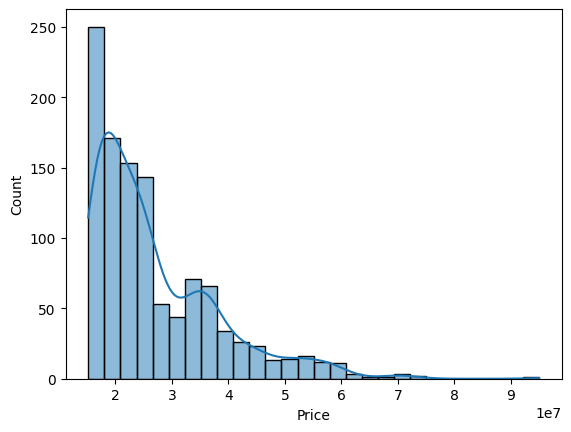

In [133]:
expensive_cars = df[df['Price'] > 1.5e7]
sns.histplot(expensive_cars['Price'], kde = True)
plt.show()

<Axes: xlabel='CC', ylabel='Count'>

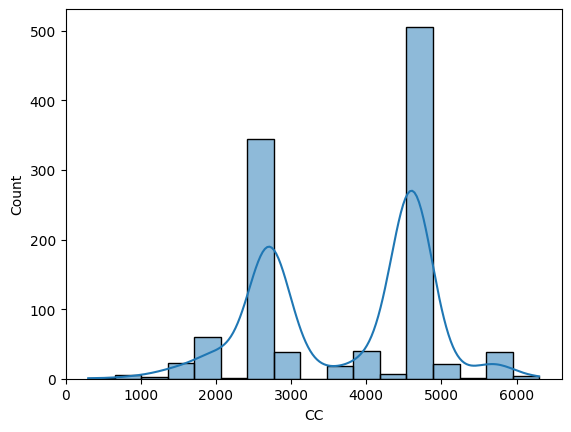

In [152]:
# plot cc of expensive cars
sns.histplot(expensive_cars['CC'], kde = True)

We would expect that the CC of an expensive car would be higher than that of a cheaper car. Let us investigate the expensive cars that have lower values than 1500

In [154]:
expensive_cars[expensive_cars['CC'] < 1500]

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
4998,Audi,e-tron,50 Quattro 230 kW,15800000.0,2020,300,Imported,7500,Un-Registered,Automatic
6972,Tesla,Model,S,30000000.0,2018,1000,Imported,42000,Un-Registered,Automatic
7456,Porsche,Taycan,Turbo S,42500000.0,2020,800,Local,500,Un-Registered,Automatic
11166,Porsche,Taycan,missing,38500000.0,2021,1000,Imported,1,Un-Registered,Automatic
29405,Audi,e-tron,50 Quattro 230 kW,16600000.0,2020,1000,Imported,11000,Un-Registered,Automatic
38084,Audi,A5,missing,15800000.0,2020,1400,Imported,465,Karachi,Automatic
39319,Audi,e-tron,50 Quattro 230 kW,16200000.0,2020,1200,Imported,6500,Islamabad,Automatic
45661,Audi,A5,S-Line Competition,15800000.0,2020,1400,Imported,800,Karachi,Automatic
64634,Audi,e-tron,50 Quattro 230 kW,15600000.0,2020,1000,Imported,6500,Islamabad,Automatic
79769,Tesla,Model,3,15500000.0,2019,1100,Imported,24000,Un-Registered,Automatic


We see Audi e-tron has a lot of variations in the CC values. Some of the values are
- 300
- 1000
- 1200

We would expect if the version of a car is same then it should have close values of CC. Outliers here might suggest that the data is incorrect. Let us check the CC of all Audi e-tron cars and see if we can find any insights from it

In [179]:
df[df['Model'] == 'e-tron']

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
2814,Audi,e-tron,50 Quattro 230 kW,16500000.0,2020,2000,Local,5933,Un-Registered,Automatic
3141,Audi,e-tron,50 Quattro 230 kW,15900000.0,2020,2000,Imported,4172,Un-Registered,Automatic
3522,Audi,e-tron,50 Quattro 230 kW,17300000.0,2021,5000,Imported,11,Un-Registered,Automatic
3976,Audi,e-tron,50 Quattro 230 kW,17200000.0,2020,1500,Local,10,Un-Registered,Automatic
4020,Audi,e-tron,50 Quattro 230 kW,18500000.0,2021,3000,Imported,300,Un-Registered,Automatic
4998,Audi,e-tron,50 Quattro 230 kW,15800000.0,2020,300,Imported,7500,Un-Registered,Automatic
9591,Audi,e-tron,50 Quattro 230 kW,15200000.0,2020,3000,Local,17000,Un-Registered,Automatic
18420,Audi,e-tron,50 Quattro 230 kW,4633000.0,2021,1000,Imported,2,Un-Registered,Automatic
23612,Audi,e-tron,50 Quattro 230 kW,16300000.0,2020,1800,Local,1100,Un-Registered,Automatic
24599,Audi,e-tron,50 Quattro 230 kW,16300000.0,2021,5000,Local,400,Islamabad,Automatic


In [167]:
df.query("Model == 'Corolla'").Version.value_counts()

Version
GLi 1.3 VVTi              3306
XLi VVTi                  1828
GLi Automatic 1.3 VVTi    1325
Altis Automatic 1.6       1245
Altis Grande CVT-i 1.8    1188
                          ... 
X L Package 1.3              2
Luxel                        1
Fielder X 202                1
Fielder X Light              1
TX                           1
Name: count, Length: 96, dtype: int64

In [178]:
df[df["Model"] == "e-tron"]

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
2814,Audi,e-tron,50 Quattro 230 kW,16500000.0,2020,2000,Local,5933,Un-Registered,Automatic
3141,Audi,e-tron,50 Quattro 230 kW,15900000.0,2020,2000,Imported,4172,Un-Registered,Automatic
3522,Audi,e-tron,50 Quattro 230 kW,17300000.0,2021,5000,Imported,11,Un-Registered,Automatic
3976,Audi,e-tron,50 Quattro 230 kW,17200000.0,2020,1500,Local,10,Un-Registered,Automatic
4020,Audi,e-tron,50 Quattro 230 kW,18500000.0,2021,3000,Imported,300,Un-Registered,Automatic
4998,Audi,e-tron,50 Quattro 230 kW,15800000.0,2020,300,Imported,7500,Un-Registered,Automatic
9591,Audi,e-tron,50 Quattro 230 kW,15200000.0,2020,3000,Local,17000,Un-Registered,Automatic
18420,Audi,e-tron,50 Quattro 230 kW,4633000.0,2021,1000,Imported,2,Un-Registered,Automatic
23612,Audi,e-tron,50 Quattro 230 kW,16300000.0,2020,1800,Local,1100,Un-Registered,Automatic
24599,Audi,e-tron,50 Quattro 230 kW,16300000.0,2021,5000,Local,400,Islamabad,Automatic


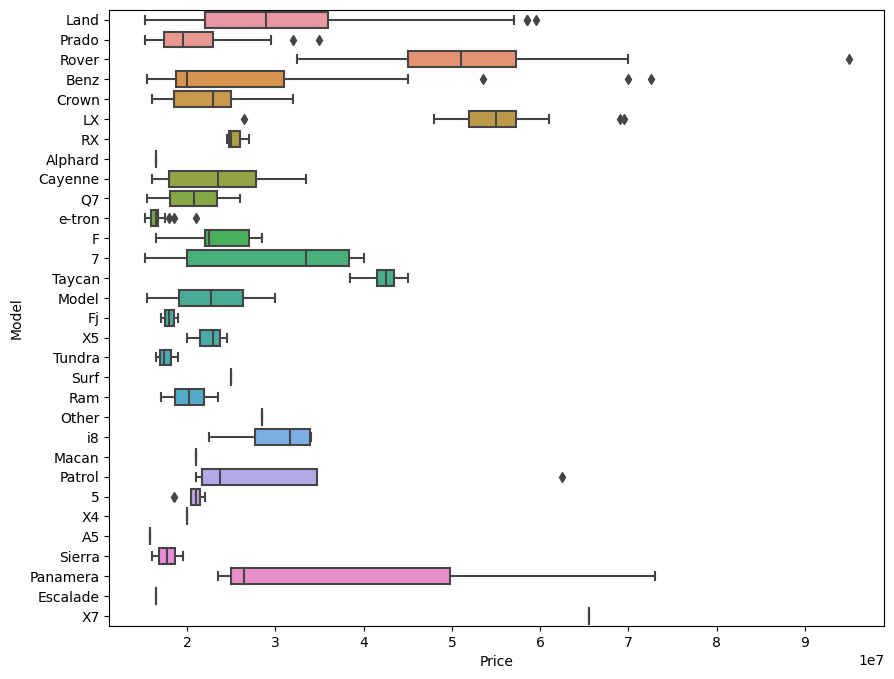

In [151]:
plt.figure(figsize=(10, 8))
sns.boxplot(y="Model", x="Price", data=expensive_cars)
plt.show()

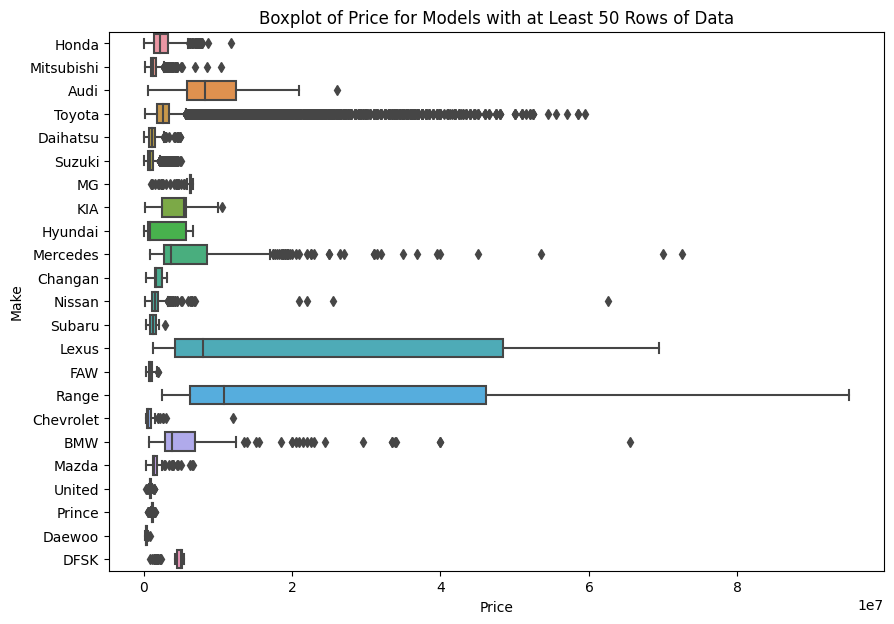

In [148]:
model_counts = df['Make'].value_counts()
models_with_at_least_50_rows = model_counts[model_counts >= 50].index
filtered_df = df[df['Make'].isin(models_with_at_least_50_rows)]

# Create a boxplot for models with at least 50 rows of data
plt.figure(figsize=(10, 7))
sns.boxplot(y='Make', x='Price', data=filtered_df)
plt.title('Boxplot of Price for Models with at Least 50 Rows of Data')
plt.show()


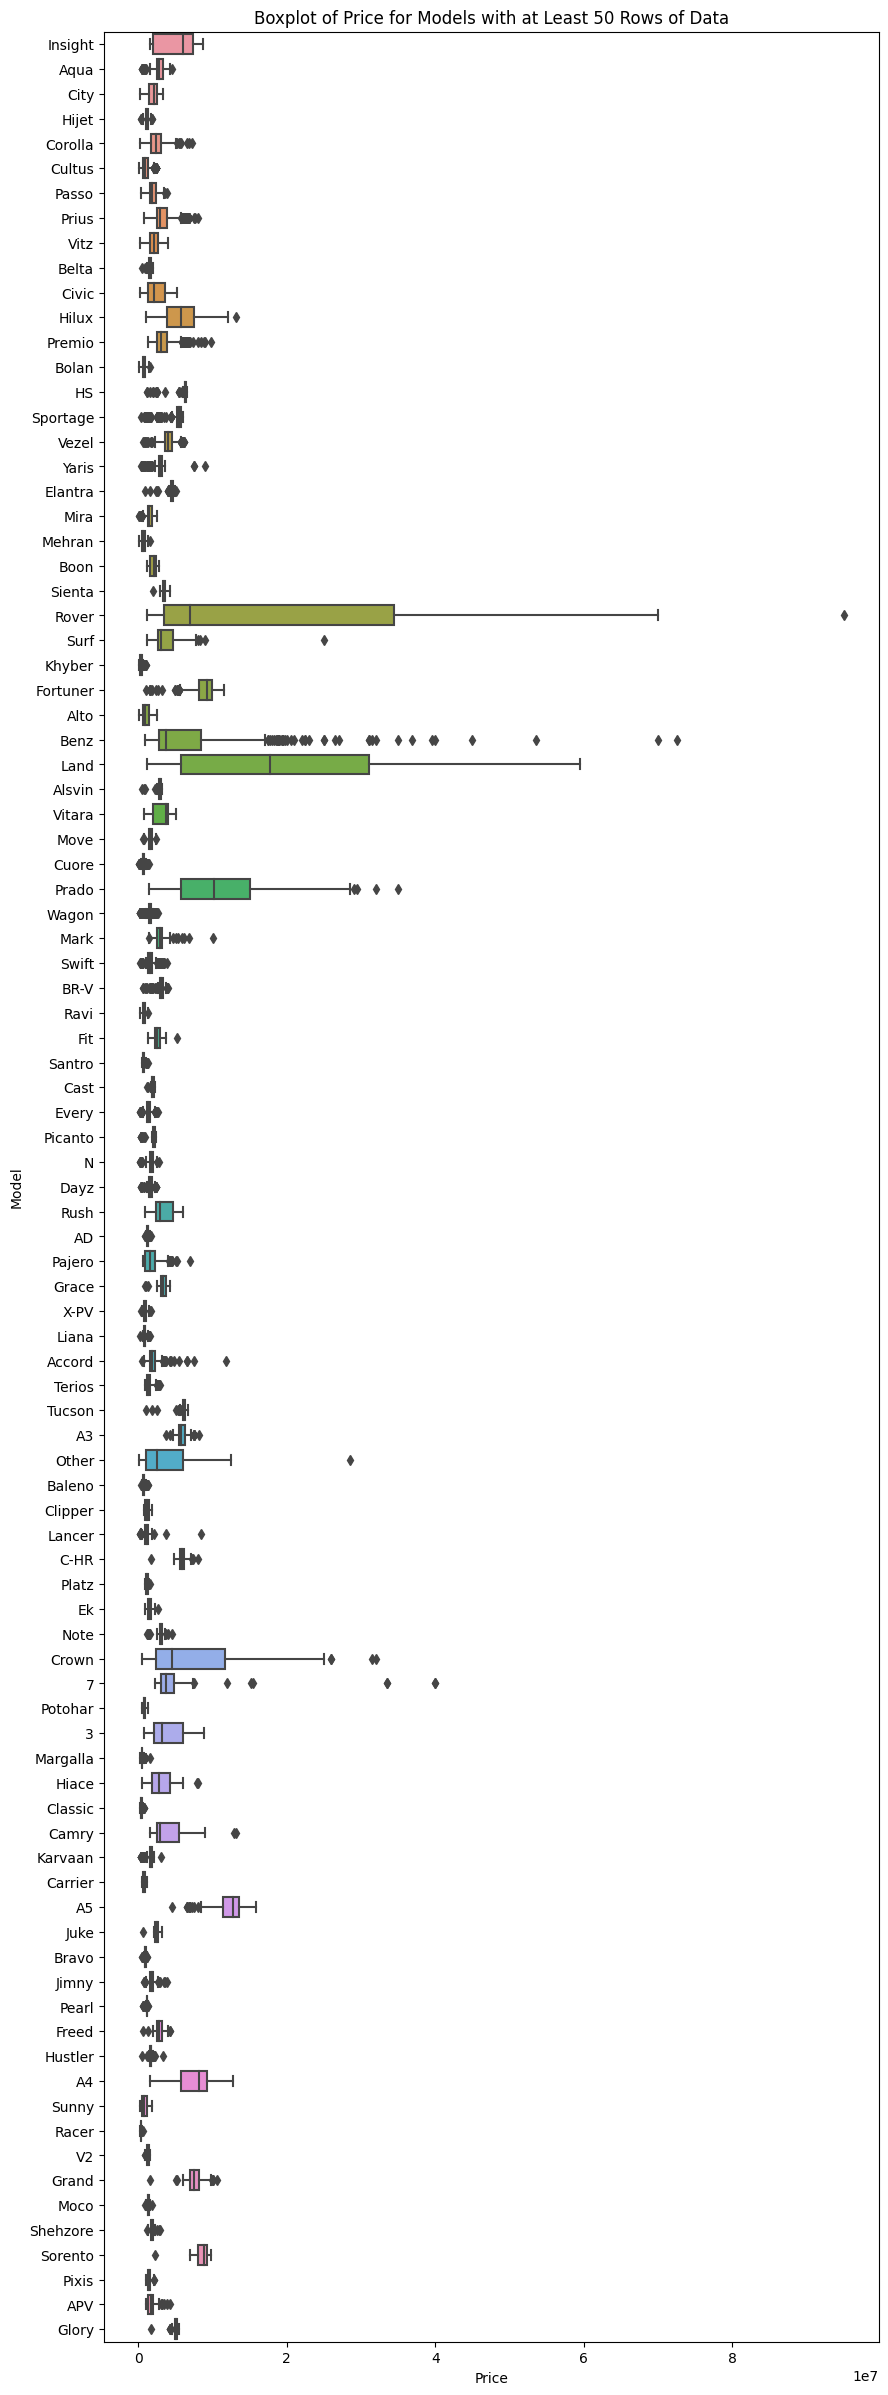

In [180]:
model_counts = df['Model'].value_counts()
models_with_at_least_50_rows = model_counts[model_counts >= 50].index
filtered_df = df[df['Model'].isin(models_with_at_least_50_rows)]

# Create a boxplot for models with at least 50 rows of data
plt.figure(figsize=(10, 30))
sns.boxplot(y='Model', x='Price', data=filtered_df)
plt.title('Boxplot of Price for Models with at Least 50 Rows of Data')
plt.show()


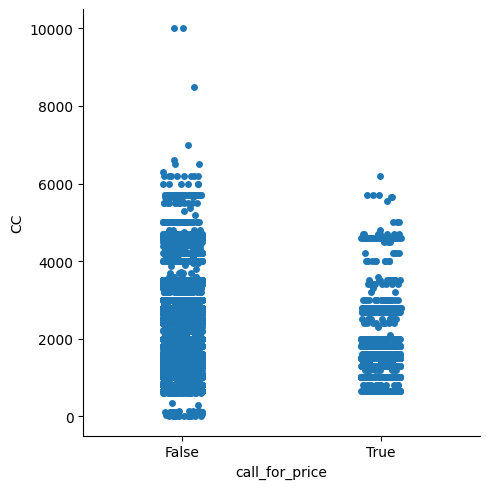

In [50]:
sns.catplot(x='call_for_price', y='CC', data=df)

<Axes: xlabel='CC', ylabel='Count'>

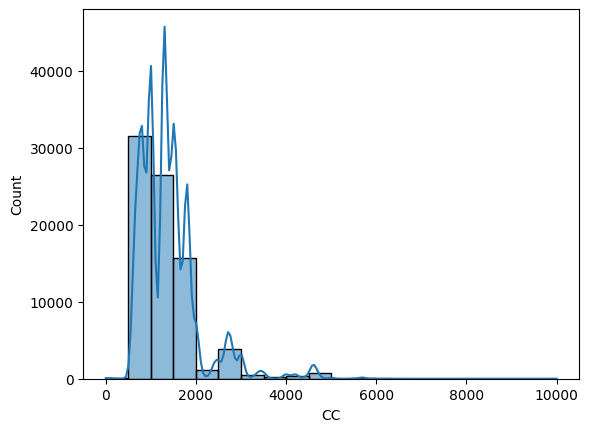

In [56]:
sns.histplot(df['CC'], kde=True, bins=20)

In [59]:
# get 10,000 CC car
df[df['Model'] == "Passo"]

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,call_for_price
8,Toyota,Passo,X L Package,1760000.0,2014,1000,Imported,82000,Islamabad,Automatic,False
20,Toyota,Passo,G 1.0,1050000.0,2006,1000,Imported,80000,Karachi,Automatic,False
249,Toyota,Passo,NaN,2350000.0,2017,1000,Imported,27500,Lahore,Automatic,False
414,Toyota,Passo,Moda,2600000.0,2019,1000,Imported,15000,Un-Registered,Automatic,False
430,Toyota,Passo,X F Package,1210000.0,2007,1000,Imported,161000,Karachi,Automatic,False
...,...,...,...,...,...,...,...,...,...,...,...
80179,Toyota,Passo,X,2200000.0,2017,1000,Imported,42000,Lahore,Automatic,False
80291,Toyota,Passo,G 1.0,1045000.0,2004,1000,Imported,160000,Peshawar,Automatic,False
80321,Toyota,Passo,Moda S,2550000.0,2017,1000,Imported,50000,Un-Registered,Automatic,False
80330,Toyota,Passo,G 1.0,1365000.0,2007,1000,Imported,108000,Islamabad,Automatic,False


In [60]:
df[df["call_for_price"] == True]

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,call_for_price
25,MG,HS,1.5 Turbo,0.0,2021,1500,Imported,5,Un-Registered,Automatic,True
27,MG,HS,1.5 Turbo,0.0,2021,1500,Local,5,Un-Registered,Automatic,True
43,Toyota,Hilux,Revo V Automatic 2.8,0.0,2021,2800,Local,5,Un-Registered,Automatic,True
50,Honda,Civic,Oriel 1.8 i-VTEC CVT,0.0,2018,1800,Local,63000,Islamabad,Automatic,True
78,Toyota,Aqua,S,0.0,2017,1500,Imported,45000,Un-Registered,Automatic,True
...,...,...,...,...,...,...,...,...,...,...,...
78179,Suzuki,Bolan,VX Euro II,0.0,2021,800,Local,28,Un-Registered,Manual,True
78401,Suzuki,Alto,ECO-S,0.0,2014,660,Imported,55000,Islamabad,Automatic,True
79059,Isuzu,D-Max,V-Cross Automatic 3.0,0.0,2019,3000,Imported,500,Karachi,Automatic,True
79124,Suzuki,Cultus,VXR (CNG),0.0,2005,1000,Local,50000,Karachi,Manual,True


In [78]:
for col in df.columns:
    print(col, df[col].nunique())

Make 66
Model 389
Version 1339
Price 2229
Make_Year 32
CC 113
Assembly 2
Mileage 8852
Registered City 187
Transmission 2
call_for_price 2


In [80]:
list = df['Make'].value_counts()
# use the top 20 versions and compare price
top_20 = list[:5]
top_20

Make
Toyota      29793
Suzuki      24209
Honda       15186
Daihatsu     3016
KIA          1321
Name: count, dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

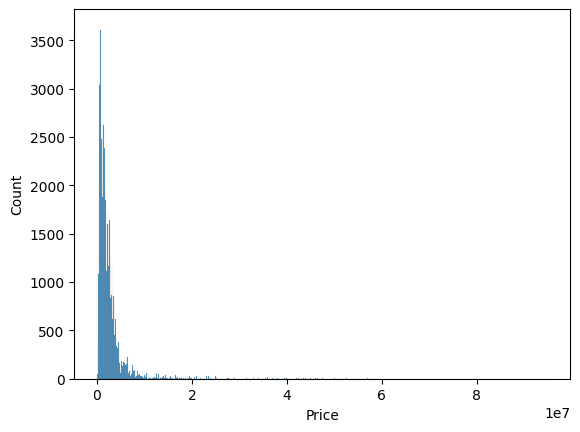

In [95]:
# plot 5 point summary of price
df['price'] = df['Price']/1000000
sns.histplot(x='Price', data=df)

In [89]:
# car with price > 2,000,000
df[df['Price'] > 20000000]

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,call_for_price
82,Toyota,Land,Cruiser ZX 60th Black Leather Selection,24500000.0,2012,4600,Imported,75000,Islamabad,Automatic,False
110,Toyota,Prado,TX L Package 2.7,23500000.0,2017,2700,Imported,19000,Un-Registered,Automatic,False
298,Range,Rover,Sport,95000000.0,2018,5000,Imported,19000,Un-Registered,Automatic,False
314,Toyota,Land,Cruiser ZX,36600000.0,2016,4608,Imported,20744,Un-Registered,Automatic,False
316,Toyota,Land,Cruiser ZX,42500000.0,2017,4608,Imported,14250,Un-Registered,Automatic,False
...,...,...,...,...,...,...,...,...,...,...,...
79707,Range,Rover,Vogue P400e,39500000.0,2018,2000,Imported,22000,Lahore,Automatic,False
79715,Toyota,Land,Cruiser ZX,26000000.0,2012,4600,Imported,70000,Karachi,Automatic,False
80016,Lexus,LX,Series LX570,59000000.0,2016,5663,Imported,36000,Un-Registered,Automatic,False
80262,Toyota,Land,Cruiser ZX,43000000.0,2017,4600,Imported,20000,Un-Registered,Automatic,False


In [91]:
# mean price of make toyota and model Land
df[(df['Make'] == 'Toyota') & (df['Model'] == 'Land')]['Price'].mean()

17340580.93346574

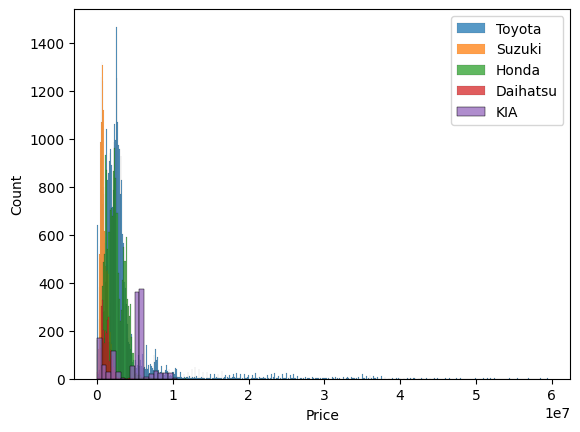

In [82]:
for versions in top_20.index:
    # plot graph for each version
    sns.histplot(df[df['Make'] == versions]['Price'], label=versions)
plt.legend()
    # add key to the graph
plt.show()
